In [1]:
from __future__ import print_function
import nilearn.plotting as nip
import nibabel as nib	
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,fixed
import inspect

class NiWidget:
    def __init__(self,filename,plotthis='dataobj'):
        self.filename = filename
        
        
    def plot_slices(self,data,x, y, z, Colormap='viridis'):

        fig,axes=plt.subplots(1,3, figsize = (15, 5))
        axes[0].imshow(np.rot90(data[:,y,:]), cmap = Colormap)
        axes[1].imshow(np.rot90(data[x,:,:]), cmap = Colormap)
        axes[2].imshow(np.rot90(data[:,:,z]), cmap = Colormap)
        plt.show()

    def nifti_plotter(self,plotting_func=None,**kwargs):

        #if no plotting function is specified: use default
        if plotting_func is None:
            self.data = nib.load(self.filename).dataobj
            kwargs = {'x': (0,self.data.shape[0]-1),
                         'y': (0,self.data.shape[1]-1),
                         'z': (0,self.data.shape[2]-1),
                         'Colormap': ['jet','viridis','gray']
                         }         
            interact(self.plot_slices,
                    data = fixed(self.data),**kwargs)

        else:
#             argname = inspect.getargspec(testfunc)[0][0]
#             print(argname,self.filename)
#             kwargs[argname] = fixed(self.filename)
#             print(kwargs)
#             import sys
#             sys.exit('bla')
            interact(plotting_func,**kwargs)

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


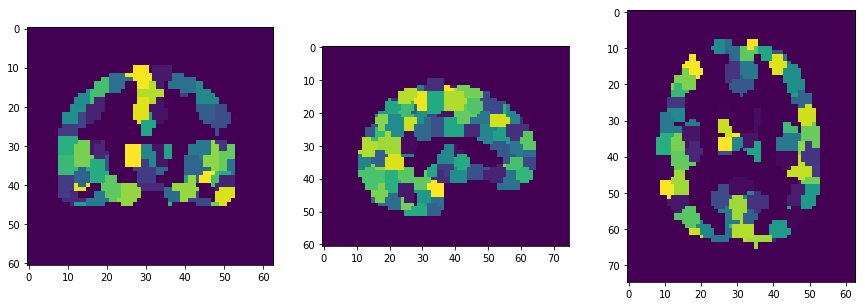

In [2]:
test = NiWidget('Autism-Gradients/cc400_roi_atlas.nii')
test.nifti_plotter()

In [3]:
nip.plot_glass_brain?

In [5]:
myfunc = nip.plot_glass_brain
inspect.getargspec(myfunc)

ArgSpec(args=['stat_map_img', 'output_file', 'display_mode', 'colorbar', 'figure', 'axes', 'title', 'threshold', 'annotate', 'black_bg', 'cmap', 'alpha', 'vmin', 'vmax', 'plot_abs', 'symmetric_cbar'], varargs=None, keywords='kwargs', defaults=(None, 'ortho', False, None, None, None, 'auto', True, False, None, 0.7, None, None, True, 'auto'))

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \


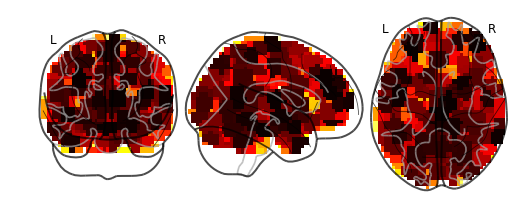

<function __main__.plot_glass_threshold>

In [6]:
def plot_glass_threshold(stat_map_img,threshold,display_mode):
    nip.plot_glass_brain(stat_map_img, threshold=threshold, display_mode=display_mode)
    plt.show()

fname = 'Autism-Gradients/cc400_roi_atlas.nii'

kwarg_dict = {'stat_map_img': fixed(fname),
            'threshold': (0,10),
             'display_mode': ['ortho','xz']
             }

interact(plot_glass_threshold,**kwarg_dict)

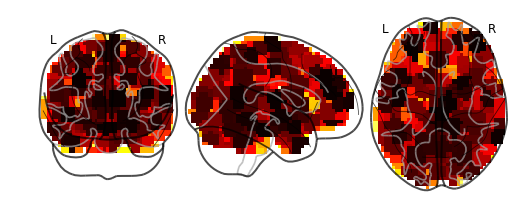

In [7]:
#right now this does the same as the above
test.nifti_plotter(plot_glass_threshold,**kwarg_dict)